In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,df7489733b004bbe40d3d37b34f82419,54,technician,married,professional.course,unknown,no,no,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,905a0b9a5456ee962223033473666be3,36,services,single,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,02d69c07ec6d68e31d641edd45ce61cd,53,blue-collar,married,basic.4y,no,yes,no,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
3,e492fbe0cccaf67cdb5c0944dbc8a167,34,blue-collar,married,basic.9y,no,yes,yes,telephone,may,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,ac2dc6f5835bdea8e71dd99b65208d07,29,services,single,university.degree,no,yes,no,telephone,aug,...,1,999,0,nonexistent,-1.7,94.027,-38.3,0.890,4991.6,0


In [4]:
df_train.campaign.unique()

array([ 1,  2,  3,  4, 13,  6,  7,  5, 12, 16,  9, 10, 35, 17,  8, 21, 11,
       25, 15, 40, 20, 14, 23, 19, 18, 24, 43, 26, 29, 22, 27, 33, 31, 28,
       34, 30, 32, 41, 39, 37])

In [6]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object' and i != '_id': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

job
{'retired', 'unemployed', 'services', 'admin.', 'self-employed', 'student', 'management', 'housemaid', 'technician', 'entrepreneur', 'unknown', 'blue-collar'}


marital
{'divorced', 'single', 'unknown', 'married'}


education
{'professional.course', 'basic.6y', 'illiterate', 'basic.4y', 'university.degree', 'high.school', 'unknown', 'basic.9y'}


default
{'yes', 'no', 'unknown'}


housing
{'yes', 'no', 'unknown'}


loan
{'yes', 'no', 'unknown'}


contact
{'telephone', 'cellular'}


month
{'oct', 'apr', 'nov', 'dec', 'aug', 'sep', 'mar', 'jun', 'jul', 'may'}


day_of_week
{'tue', 'mon', 'wed', 'thu', 'fri'}


poutcome
{'success', 'failure', 'nonexistent'}




In [165]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    drop_column_list = ['_id', 'nr.employed']
    # 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 
    
    df_output = df_output.drop(drop_column_list, axis=1)
    
    gap_column_list = ['default', 'housing', 'loan']
    for column in gap_column_list:
        df_output[column + '_gap'] = df_output[column].map(lambda x: 1 if (x in set(['unknown'])) else 0)
    
    one_hot_keys = ['job', 'marital', 'contact', 'education', 'poutcome', 'default', 'housing', 'loan', 'day_of_week', 'month']
    #one_hot_keys = ['job', 'marital', 'contact', 'education', 'day_of_week', 'month']
    for column in one_hot_keys:
        df_one_hot = pd.get_dummies(df_output[column], prefix=column)
        df_output = pd.concat([df_output, df_one_hot], axis=1)
    df_output = df_output.drop(one_hot_keys, axis=1)
        
    cleanup_nums = {
 #                   "default": {"yes": -1, "unknown": 0, "no": 1},
 #                   "housing": {"no": -1, "unknown": 0, "yes": 1},
 #                   "loan": {"no": -1, "unknown": 0, "yes": 1},
 #                   "poutcome": {"failure": -1, "nonexistent": 0, "success": 1}
 #                   "month": {"mar": 1, "apr": 2, "may": 3, "jun": 4, "jul": 5, "aug": 6, "sep": 7, "oct": 8, "nov": 9, "dec": 10},
 #                   "day_of_week": {"mon": 1, "tue": 2, "wed": 3, "thu": 4, "fri": 5}
 #                   "education": {
 #                       "unknown": 0,
 #                       "illiterate": 1,
 #                       "basic.4y": 2,
 #                       "basic.6y": 3,
 #                       "basic.9y": 4,
 #                       "high.school": 5,
 #                       "professional.course": 6,
 #                       "university.degree": 7
 #                   }
                   }
    df_output.replace(cleanup_nums, inplace=True)
        
    return df_output

In [172]:
df_train_prep = df_train.pipe(preproc_data)

In [173]:
X = df_train_prep.drop(['target'], axis=1).values
y = df_train_prep['target'].values

In [174]:
from sklearn.model_selection import train_test_split
# test_size=0.3, random_state=42
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

In [179]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

clrs = {
    'DecisionTreeClassifier':DecisionTreeClassifier,
    'RandomForestClassifier':RandomForestClassifier,
    'KNeighborsClassifier':KNeighborsClassifier,
    'LogisticRegression':LogisticRegression
}

y_pred = {}
y_pred_proba = {}

for clr_name in clrs.keys():
    clr_instance = clrs[clr_name]()
    clr_instance.fit(X_train, y_train)
    y_pred[clr_name] = clr_instance.predict(X_test)
    y_pred_proba[clr_name] = clr_instance.predict_proba(X_test)
    
y_pred

{'DecisionTreeClassifier': array([1, 0, 0, ..., 0, 1, 0]),
 'RandomForestClassifier': array([1, 0, 0, ..., 0, 0, 0]),
 'KNeighborsClassifier': array([1, 0, 0, ..., 0, 1, 0]),
 'LogisticRegression': array([1, 0, 0, ..., 0, 0, 0])}

In [180]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics = {}

for clr_name in clrs.keys():
    
    metrics[clr_name] = [accuracy_score(y_test, y_pred[clr_name]),
                         precision_score(y_test, y_pred[clr_name]),
                         recall_score(y_test, y_pred[clr_name]),
                         f1_score(y_test, y_pred[clr_name])
                        ]
    
    print('{} metrics: '.format(clr_name), metrics[clr_name])

DecisionTreeClassifier metrics:  [0.8856217966010251, 0.4970484061393152, 0.49940688018979834, 0.49822485207100586]
RandomForestClassifier metrics:  [0.9057189101699488, 0.6313868613138686, 0.41043890865954924, 0.4974838245866284]
KNeighborsClassifier metrics:  [0.8970865929322903, 0.5701754385964912, 0.38552787663107946, 0.4600141542816702]
LogisticRegression metrics:  [0.9104397086592932, 0.6711281070745698, 0.41637010676156583, 0.5139092240117131]


(-0.01, 1.01)

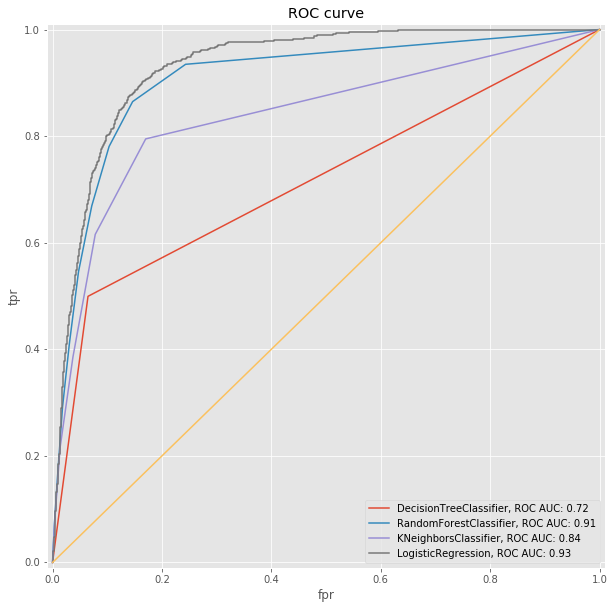

In [181]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

roc_curve_data = {}

for clr_name in clrs.keys():
    
    roc_curve_data[clr_name] = roc_curve(y_test, y_pred_proba[clr_name][:,1])
    
#print(roc_curve_data)
plt.figure(figsize=(10, 10))

for clr_name in clrs.keys():
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[clr_name][:,1])
    auc = roc_auc_score(y_test, y_pred_proba[clr_name][:,1])
    
    plt.plot(fpr, tpr, label='{}, ROC AUC: {:.2f}'.format(clr_name, auc))
    
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.legend()
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [183]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv_method = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

for clr_name in clrs.keys():
    clr_instance = clrs[clr_name]()

    print(
        '{} mean ROC AUC: '.format(clr_name),
        cross_val_score(
            clr_instance,
            X,
            y,
            scoring='roc_auc',
            cv=cv_method,
            n_jobs=-1
        ).mean().round(5)
    )

DecisionTreeClassifier mean ROC AUC:  0.73228
RandomForestClassifier mean ROC AUC:  0.91068
KNeighborsClassifier mean ROC AUC:  0.847
LogisticRegression mean ROC AUC:  0.92874


In [184]:
id = df_test['_id'].values

In [161]:
df_test_prep = df_test.pipe(preproc_data)

X_ = df_test_prep.values

In [162]:
clr = LogisticRegression()
clr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [163]:
y_ = clr.predict(X_)

In [164]:
with open('result.csv', 'w') as r:
    r.write('_id,target\n')

    for id1, target in zip(id, y_):
        r.write('{},{}\n'.format(id1, target))
    
    r.close()

In [168]:
y_proba_ = clr.predict_proba(X_)

In [171]:
with open('result_proba.csv', 'w') as r:
    r.write('_id,target\n')

    for id1, target in zip(id, y_proba_[:,1]):
        r.write('{},{}\n'.format(id1, target))
    
    r.close()

In [170]:
y_proba_

array([[0.93378637, 0.06621363],
       [0.9830647 , 0.0169353 ],
       [0.92983517, 0.07016483],
       ...,
       [0.96100778, 0.03899222],
       [0.95257953, 0.04742047],
       [0.97015025, 0.02984975]])